<a href="https://colab.research.google.com/github/twyeh/AI-in-education/blob/main/MNIST_Gemini_program20250303.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
!pip install keras

# 模型
1. 定義訓練模型為 keras 的 Squential
2. 該模型包含一層平坦輸入層(28X28=784個neurons)、一層稠密隱藏層(128個neurons) 、及一層稠密輸出層(10個neurons)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Input layer for MNIST images (28x28 pixels)
    layers.Dense(128, activation='relu'), # Hidden layer with 128 neurons and ReLU activation
    layers.Dense(10, activation='softmax') # Output layer with 10 neurons (for 0-9 digits) and softmax activation
])

# Compile the model
model.compile(optimizer='adam', # Optimization algorithm
              loss='sparse_categorical_crossentropy', # Loss function for multi-class classification
              metrics=['accuracy']) # Evaluation metric

# Load and pre-process MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train / 255.0 # Normalize pixel values to the range [0, 1]
x_test = x_test / 255.0

# Train the model
model.fit(x_train, y_train, epochs=10) # Train for 10 epochs

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8777 - loss: 0.4337
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9632 - loss: 0.1270
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9757 - loss: 0.0821
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9828 - loss: 0.0567
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9868 - loss: 0.0451
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9893 - loss: 0.0348
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9917 - loss: 0.0266
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9936 - loss: 0.0212
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9940 - loss: 0.0189
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9963 - loss: 0.0138
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - los

 # 驗證
 1. 自測試數據集中隨機取5個資料
 2. 驗證訓練模型的學習成效

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


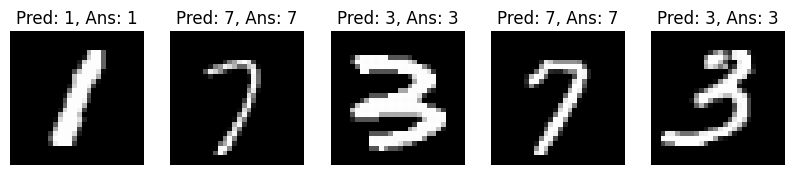

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Select a few random samples from the test set
num_samples = 5
sample_indices = np.random.choice(x_test.shape[0], num_samples, replace=False)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

# Make predictions on the selected samples
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Display the images and predicted labels
plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}, Ans: {sample_labels[i]}")
    plt.axis('off')

plt.show()